# The basal ganglia

The basal ganglia
according to [Stewart 2010](
http://compneuro.uwaterloo.ca/files/publications/stewart.2010.pdf)
is an action selector
that chooses whatever action has the best "salience" or "goodness".
Its really interesting behaviour manifests itself
when it interacts with the thalamus and other components of the brain,
but in this example we will only show the basal ganglia's basic behaviour.
It will choose between three actions
that we'll pretend are "eating", "sleeping" and "playing".

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import nengo

## Step 1: Create the Network

Here we create the basal ganglia and the action input node.

In [2]:
model = nengo.Network(label='Basal Ganglia')
with model:
    basal_ganglia = nengo.networks.BasalGanglia(dimensions=3)


class ActionIterator:
    def __init__(self, dimensions):
        self.actions = np.ones(dimensions) * 0.1

    def step(self, t):
        # one action at time dominates
        dominate = int(t % 3)
        self.actions[:] = 0.1
        self.actions[dominate] = 0.8
        return self.actions


action_iterator = ActionIterator(dimensions=3)

with model:
    actions = nengo.Node(action_iterator.step, label="actions")

## Step 2: Connect the Network

Connect the input to the basal ganglia and connect the probes

In [3]:
with model:
    nengo.Connection(actions, basal_ganglia.input, synapse=None)
    selected_action = nengo.Probe(basal_ganglia.output, synapse=0.01)
    input_actions = nengo.Probe(actions, synapse=0.01)

## Step 3: Simulate the Network and Plot the Results

In [4]:
with nengo.Simulator(model) as sim:
    # This will take a while
    sim.run(6)

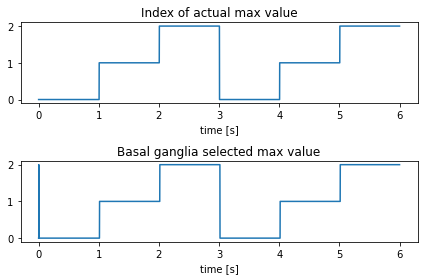

In [5]:
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(sim.trange(), sim.data[input_actions].argmax(axis=1))
plt.ylim(-0.1, 2.1)
plt.xlabel('time [s]')
plt.title("Index of actual max value")
plt.subplot(2, 1, 2)
plt.plot(sim.trange(), sim.data[selected_action].argmax(axis=1))
plt.ylim(-0.1, 2.1)
plt.xlabel('time [s]')
plt.title("Basal ganglia selected max value")
plt.tight_layout()

As expected, the maximum index
is found at 0, then 1, then 2
or "eating", "sleeping", then "playing".
Note that if you zoom in enough on the basal ganglia values,
you'll be able to see a bit of a delay between finding max values.
If you read the aforementioned paper,
you'll see that this is expected and matches previous experiments.